In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import researchpy, numpy, pandas
import scipy.stats
from scipy import stats
import math
import statistics
import researchpy as rp
import scipy.stats as stats

In [76]:
#De data binnenhalen
train = pd.read_csv('Airlinesatisfaction.csv')

In [77]:
# Drop unnecessary columns
new_train = train.drop('Unnamed: 0', axis=1)
new_train = train.drop('id', axis=1)

new_train.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [90]:
#Random steekproef van 100
random_subset = new_train.sample(n=100) 
random_subset.head(5)

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
59793,59793,Male,Loyal Customer,37,Business travel,Business,2684,1,0,0,...,3,3,0,5,1,3,3,0,6.0,neutral or dissatisfied
11544,11544,Male,Loyal Customer,42,Business travel,Business,2301,3,3,3,...,5,5,5,5,3,5,3,0,0.0,satisfied
69443,69443,Male,Loyal Customer,12,Personal Travel,Eco,363,1,5,1,...,4,3,4,4,4,4,4,0,0.0,neutral or dissatisfied
59220,59220,Female,Loyal Customer,15,Personal Travel,Eco,407,3,5,3,...,4,2,5,5,4,1,4,3,0.0,neutral or dissatisfied
79446,79446,Male,disloyal Customer,24,Business travel,Business,1046,4,5,4,...,4,3,4,4,5,5,4,13,0.0,satisfied


In [91]:
#Check de data even; zorg dat je geen missing values hebt (zit alleen bij Arrival Delay)
random_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 59793 to 34123
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         100 non-null    int64  
 1   Gender                             100 non-null    object 
 2   Customer Type                      100 non-null    object 
 3   Age                                100 non-null    int64  
 4   Type of Travel                     100 non-null    object 
 5   Class                              100 non-null    object 
 6   Flight Distance                    100 non-null    int64  
 7   Inflight wifi service              100 non-null    int64  
 8   Departure/Arrival time convenient  100 non-null    int64  
 9   Ease of Online booking             100 non-null    int64  
 10  Gate location                      100 non-null    int64  
 11  Food and drink                     100 non-null    i

In [92]:
#Vervang codering voor cijfers
random_subset['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
random_subset.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
59793,59793,Male,Loyal Customer,37,Business travel,Business,2684,1,0,0,...,3,3,0,5,1,3,3,0,6.0,0
11544,11544,Male,Loyal Customer,42,Business travel,Business,2301,3,3,3,...,5,5,5,5,3,5,3,0,0.0,1
69443,69443,Male,Loyal Customer,12,Personal Travel,Eco,363,1,5,1,...,4,3,4,4,4,4,4,0,0.0,0
59220,59220,Female,Loyal Customer,15,Personal Travel,Eco,407,3,5,3,...,4,2,5,5,4,1,4,3,0.0,0
79446,79446,Male,disloyal Customer,24,Business travel,Business,1046,4,5,4,...,4,3,4,4,5,5,4,13,0.0,1


In [93]:
#Eens kijken wat we in de dataset hebben; de variabelen met gemiddelde en de standaardafwijking
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,46813.15,29247.080360,214.0,22168.50,44525.0,70545.00,102631.0
Age,100.0,40.19,15.079383,9.0,30.00,38.0,53.00,68.0
Flight Distance,100.0,1085.25,880.029067,83.0,449.25,779.5,1428.75,3870.0
Inflight wifi service,100.0,2.72,1.263952,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,100.0,3.14,1.470381,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,100.0,2.75,1.388081,0.0,2.00,3.0,4.00,5.0
Gate location,100.0,2.76,1.231899,1.0,2.00,3.0,4.00,5.0
Food and drink,100.0,3.03,1.351804,1.0,2.00,3.0,4.00,5.0
Online boarding,100.0,3.10,1.388990,0.0,2.00,3.0,4.00,5.0
Seat comfort,100.0,3.04,1.441940,1.0,2.00,3.0,4.00,5.0


In [94]:
random_subset['Age'].value_counts()

38    6
55    5
26    4
46    4
31    4
30    4
37    4
24    4
32    3
22    3
63    3
53    3
51    3
23    3
68    3
44    2
33    2
35    2
61    2
56    2
12    2
48    2
25    2
39    2
47    2
60    2
58    2
11    2
40    2
52    1
27    1
49    1
9     1
65    1
64    1
54    1
45    1
41    1
16    1
15    1
42    1
67    1
50    1
36    1
34    1
Name: Age, dtype: int64

In [95]:
random_subset['satisfaction'].value_counts()

0    62
1    38
Name: satisfaction, dtype: int64

In [96]:
#Mooiere output
rp.summary_cont(random_subset['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,100.0,40.19,15.0794,1.5079,37.1979,43.1821


In [97]:
#Bekend is dat een aantal libraries niet werken met spaties in de variabele namen. Deze eerst maar omzetten
# Replace spaces in the column names with underscore
random_subset.columns = [c.replace(' ', '_') for c in random_subset.columns]

In [98]:
rp.summary_cont(random_subset['Flight_Distance'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Flight_Distance,100.0,1085.25,880.0291,88.0029,910.6331,1259.8669


C:\Users\Aghoo\AppData\Local\Temp\ipykernel_8872\931596904.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Flight Distance Distribution')

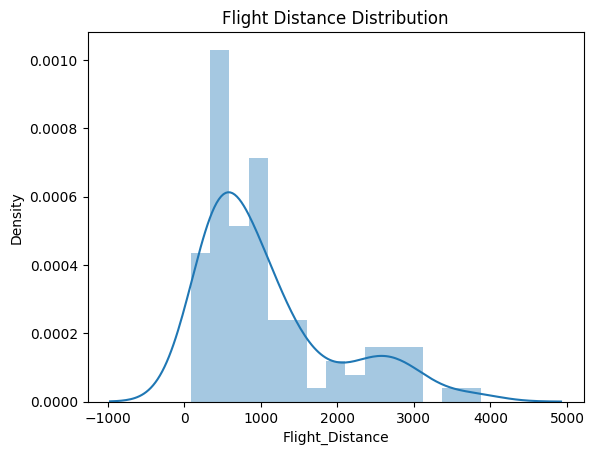

In [99]:
#Visuele checks van de verdelingen
x = random_subset['Flight_Distance']
sns.distplot(x, bins = 15)
plt.title('Flight Distance Distribution')


C:\Users\Aghoo\AppData\Local\Temp\ipykernel_8872\3321396133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Age')

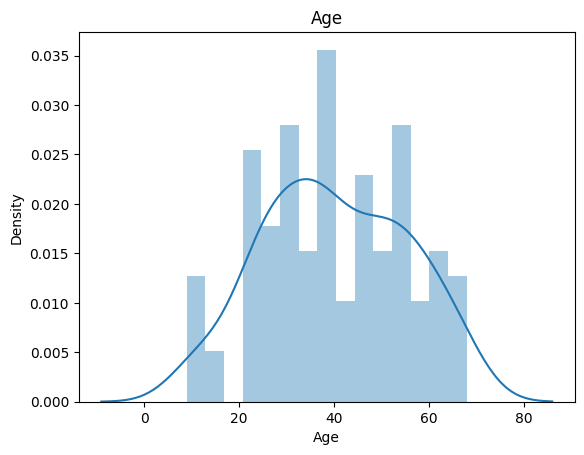

In [100]:
x = random_subset['Age']
sns.distplot(x, bins = 15)
plt.title('Age')


C:\Users\Aghoo\AppData\Local\Temp\ipykernel_8872\2432483861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Departure Delay in Minutes')

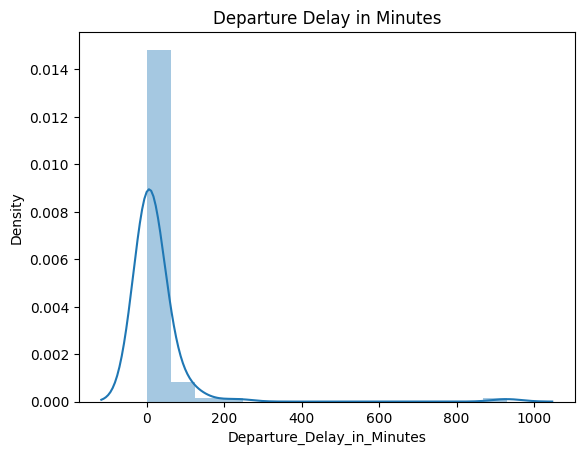

In [101]:
x = random_subset['Departure_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Departure Delay in Minutes')

C:\Users\Aghoo\AppData\Local\Temp\ipykernel_8872\403260203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins = 15)


Text(0.5, 1.0, 'Arrival Delay in Minutes')

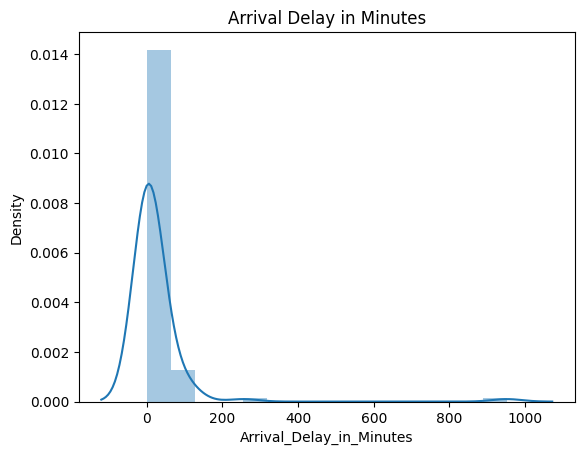

In [102]:
x = random_subset['Arrival_Delay_in_Minutes']
sns.distplot(x, bins = 15)
plt.title('Arrival Delay in Minutes')

In [103]:
#We willen een toets doen om te bepalen of de data normaal verdeeld is
#Dan moeten we de betrefffende variabele eerst sorteren van laag naar hoog
#Dat blijkt evenwel slechts bij sommige librairies met KS nodig te zijn
#Hierbij toch de code, voor het geval je een andere library gebruikt
#waarbij het wel nodig is
random_subset.sort_values(
    ['Age'],
    ascending=True,
    inplace=True)

random_subset.sort_values(
    ['Flight_Distance'],
    ascending=True,
    inplace=True)

random_subset.sort_values(
    ['Departure_Delay_in_Minutes'],
    ascending=True,
    inplace=True)

random_subset.sort_values(
    ['Arrival_Delay_in_Minutes'],
    ascending=True,
    inplace=True)

In [104]:
#Vervolgens moeten we de data normaliseren (dus omzetten in z -scores)
#Ik maak daar een nieuwe dataset van (df_z)
from sklearn.preprocessing import StandardScaler
#En ik zet eerst alle scores om in cijfers
random_subset['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
random_subset['Customer_Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
random_subset['Type_of_Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
random_subset['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

In [105]:
#Eindelijk is het zover
random_subset[0:5]

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
10156,10156,1,0,30,1,2,83,2,3,3,...,3,3,2,1,3,1,3,0,0.0,0
32208,32208,1,1,44,1,3,2683,4,4,5,...,4,4,4,4,4,4,4,0,0.0,1
14966,14966,1,0,35,1,1,577,1,1,1,...,1,4,5,4,1,3,1,0,0.0,0
79063,79063,1,1,41,1,3,3870,2,3,2,...,5,5,5,5,3,5,4,0,0.0,1
93944,93944,1,1,56,0,1,290,3,4,3,...,2,2,3,2,4,2,3,0,0.0,0


In [106]:
scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(random_subset), columns = random_subset.columns)
df_z[0:5]

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,-1.259675,1.020204,-2.134375,-0.679161,0.799590,0.031464,-1.144620,-0.572511,-0.095693,0.181012,...,-0.139544,-0.156174,-0.809979,-2.245102,-0.175490,-2.186677,-0.090310,-0.260021,-0.248142,-0.782881
1,-0.501887,1.020204,0.468521,0.253936,0.799590,1.080268,1.824712,1.017798,0.587829,1.629109,...,0.594897,0.624695,0.704000,0.438287,0.622191,0.317152,0.662272,-0.260021,-0.248142,1.277333
2,-1.094386,1.020204,-2.134375,-0.345912,0.799590,-1.017339,-0.580447,-1.367666,-1.462737,-1.267085,...,-1.608426,0.624695,1.460990,0.438287,-1.770851,-0.517458,-1.595474,-0.260021,-0.248142,-0.782881
3,1.108224,1.020204,0.468521,0.053986,0.799590,1.080268,3.180326,-0.572511,-0.095693,-0.543036,...,1.329338,1.405564,1.460990,1.332750,-0.175490,1.151761,0.662272,-0.260021,-0.248142,1.277333
4,1.619590,1.020204,0.468521,1.053733,-1.250641,-1.017339,-0.908216,0.222643,0.587829,0.181012,...,-0.873985,-0.937043,-0.052989,-1.350639,0.622191,-1.352067,-0.090310,-0.260021,-0.248142,-0.782881


In [107]:
#Dan een test. Er zijn vele mogelijkheden; we kiezen voor de Kolmogorov Smirnov Test
#Deze voer ik dus uit op de gestandaardiseerde dataset
stats.kstest(df_z['Age'], stats.norm.cdf)

KstestResult(statistic=0.06802472497327638, pvalue=0.717746358180801, statistic_location=-0.14596305980214794, statistic_sign=1)

In [108]:
stats.kstest(df_z['Flight_Distance'], stats.norm.cdf)


KstestResult(statistic=0.17783585213246045, pvalue=0.003081061768225646, statistic_location=0.005424740841516344, statistic_sign=1)

In [109]:
stats.kstest(df_z['Departure_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.39742395062150637, pvalue=9.281976099071208e-15, statistic_location=-0.26002057697737835, statistic_sign=-1)

In [110]:
stats.kstest(df_z['Arrival_Delay_in_Minutes'], stats.norm.cdf)

KstestResult(statistic=0.40201235421027476, pvalue=4.191083209317982e-15, statistic_location=-0.24814178269290402, statistic_sign=-1)

In [111]:
random_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed:_0,100.0,46813.15,29247.080360,214.0,22168.50,44525.0,70545.00,102631.0
Gender,100.0,0.49,0.502418,0.0,0.00,0.0,1.00,1.0
Customer_Type,100.0,0.82,0.386123,0.0,1.00,1.0,1.00,1.0
Age,100.0,40.19,15.079383,9.0,30.00,38.0,53.00,68.0
Type_of_Travel,100.0,0.61,0.490207,0.0,0.00,1.0,1.00,1.0
Class,100.0,1.97,0.958271,1.0,1.00,2.0,3.00,3.0
Flight_Distance,100.0,1085.25,880.029067,83.0,449.25,779.5,1428.75,3870.0
Inflight_wifi_service,100.0,2.72,1.263952,0.0,2.00,3.0,4.00,5.0
Departure/Arrival_time_convenient,100.0,3.14,1.470381,0.0,2.00,3.0,4.00,5.0
Ease_of_Online_booking,100.0,2.75,1.388081,0.0,2.00,3.0,4.00,5.0


<AxesSubplot: xlabel='Age'>

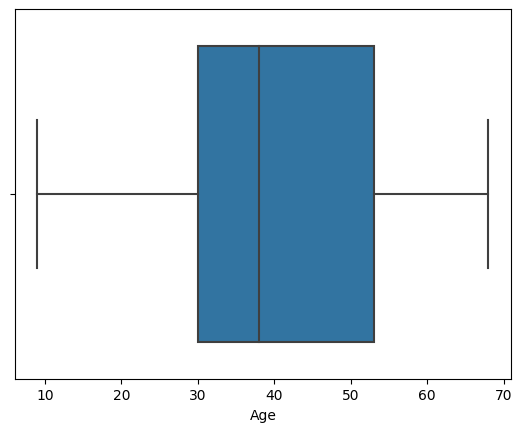

In [112]:
import seaborn as sns
sns.boxplot(x=random_subset['Age'])

<AxesSubplot: xlabel='Flight_Distance'>

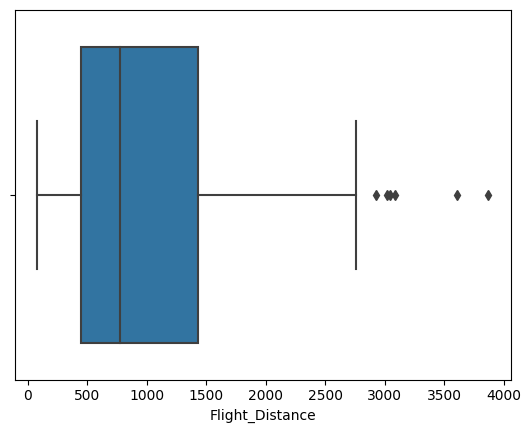

In [113]:
sns.boxplot(x=random_subset['Flight_Distance'])

<AxesSubplot: xlabel='Departure_Delay_in_Minutes'>

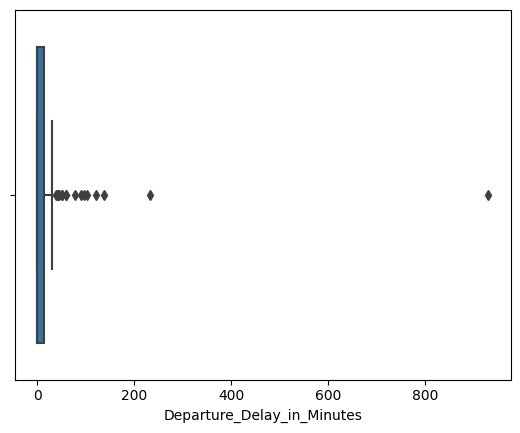

In [114]:
sns.boxplot(x=random_subset['Departure_Delay_in_Minutes'])

<AxesSubplot: xlabel='Arrival_Delay_in_Minutes'>

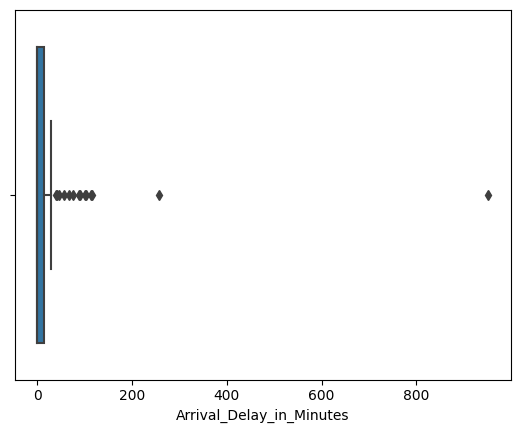

In [115]:
sns.boxplot(x=random_subset['Arrival_Delay_in_Minutes'])

In [116]:
# Maak eerst een opsplitsing in de data tussen tevreden en ontevreden passagiers
tevreden = random_subset.loc[random_subset['satisfaction'] == 1]
ontevreden = random_subset.loc[random_subset['satisfaction'] == 0]

In [117]:
#Correlaties berekenen. Een gemakkelijke waarbij we alle relevante variabelen in een tabel krijgen
random_subset.corr()

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Unnamed:_0,1.000000,0.057005,-0.011745,0.002447,0.098868,0.001645,0.054929,-0.083341,-0.089354,-0.034047,...,0.011133,0.019109,0.037171,-0.159868,0.040770,-0.162805,0.024376,-0.005479,-0.008322,-0.057894
Gender,0.057005,1.000000,-0.165577,-0.117740,-0.036501,-0.095041,-0.159902,0.059171,-0.121144,0.076040,...,-0.019246,0.065606,0.129774,-0.053500,0.003510,-0.056431,0.062025,0.098195,0.099713,-0.107977
Customer_Type,-0.011745,-0.165577,1.000000,0.264422,-0.374625,0.094455,0.243147,-0.145707,0.116000,-0.141347,...,0.218313,0.134146,0.044530,-0.042373,0.061458,-0.039972,0.199024,0.071553,0.081854,0.098670
Age,0.002447,-0.117740,0.264422,1.000000,-0.033602,0.136009,0.014984,0.029318,0.003344,-0.000121,...,0.104455,0.208283,-0.156571,-0.156605,-0.026678,-0.092218,0.102686,0.034504,0.054689,0.035399
Type_of_Travel,0.098868,-0.036501,-0.374625,-0.033602,1.000000,0.469408,0.299210,0.148027,-0.273829,0.211537,...,0.051347,-0.003202,0.057890,0.016321,-0.072286,0.003080,0.025922,0.091853,0.082209,0.414788
Class,0.001645,-0.095041,0.094455,0.136009,0.469408,1.000000,0.493785,0.009674,-0.040002,0.184151,...,0.158447,0.176899,0.096939,0.108165,0.122647,0.147583,0.073879,0.106986,0.123230,0.435177
Flight_Distance,0.054929,-0.159902,0.243147,0.014984,0.299210,0.493785,1.000000,0.027298,0.066114,0.178910,...,0.108161,0.084907,0.058184,0.040138,-0.009160,-0.011433,0.064814,0.120286,0.132812,0.140549
Inflight_wifi_service,-0.083341,0.059171,-0.145707,0.029318,0.148027,0.009674,0.027298,1.000000,0.108266,0.759965,...,0.317226,0.214835,0.138202,0.087340,0.134214,0.135118,0.175696,0.035427,0.021247,0.436414
Departure/Arrival_time_convenient,-0.089354,-0.121144,0.116000,0.003344,-0.273829,-0.040002,0.066114,0.108266,1.000000,0.264773,...,0.001707,0.134503,0.057020,-0.019197,0.168586,0.053168,0.109671,0.045058,0.044290,-0.060834
Ease_of_Online_booking,-0.034047,0.076040,-0.141347,-0.000121,0.211537,0.184151,0.178910,0.759965,0.264773,1.000000,...,0.147566,0.130039,0.234312,-0.001619,0.147278,0.135967,0.076287,0.113195,0.096323,0.290881


In [118]:
#Correlatie berekenen
stats.pearsonr(random_subset['Age'],random_subset['Departure_Delay_in_Minutes'])

PearsonRResult(statistic=0.034503905466578284, pvalue=0.7332522210050365)

In [119]:
#Tijd voor meer overzicht
import pingouin as pg

In [120]:
#Correlatie tussen alle variabelen in een tabel
random_subset.iloc[:, 0:25].rcorr() # alleen de kolommen met meer dan 50% niet-null waardes worden meegenomen.

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
Unnamed:_0,-,,,,,,,,,,...,,,,,,,,,,
Gender,0.057,-,,,,,,,,,...,,,,,,,,,,
Customer_Type,-0.012,-0.166,-,**,***,,*,,,,...,*,,,,,,*,,,
Age,0.002,-0.118,0.264,-,,,,,,,...,,*,,,,,,,,
Type_of_Travel,0.099,-0.037,-0.375,-0.034,-,***,**,,**,*,...,,,,,,,,,,***
Class,0.002,-0.095,0.094,0.136,0.469,-,***,,,,...,,,,,,,,,,***
Flight_Distance,0.055,-0.16,0.243,0.015,0.299,0.494,-,,,,...,,,,,,,,,,
Inflight_wifi_service,-0.083,0.059,-0.146,0.029,0.148,0.01,0.027,-,,***,...,**,*,,,,,,,,***
Departure/Arrival_time_convenient,-0.089,-0.121,0.116,0.003,-0.274,-0.04,0.066,0.108,-,**,...,,,,,,,,,,
Ease_of_Online_booking,-0.034,0.076,-0.141,-0.0,0.212,0.184,0.179,0.76,0.265,-,...,,,*,,,,,,,**


In [121]:
#Beperking van aantal variabelen met nu ook de p waardes in de tabel
#Bepaal het significantie niveau (p waardes)
#Onder de diagonaal de r waardes; boven de diagonaal de p waardes
random_subset.iloc[:, [0,1,2,5,20,21]].rcorr(stars=False, decimals=3)

,Unnamed:_0,Gender,Customer_Type,Class,Cleanliness,Departure_Delay_in_Minutes
Unnamed:_0,-,0.573,0.908,0.987,0.81,0.957
Gender,0.057,-,0.1,0.347,0.54,0.331
Customer_Type,-0.012,-0.166,-,0.35,0.047,0.479
Class,0.002,-0.095,0.094,-,0.465,0.289
Cleanliness,0.024,0.062,0.199,0.074,-,0.74
Departure_Delay_in_Minutes,-0.005,0.098,0.072,0.107,-0.034,-


In [122]:
#Niet omdat het moet, maar omdat het kan 
random_subset.iloc[:, [0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].rcorr(stars=False, decimals=3)

,Unnamed:_0,Gender,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service
Unnamed:_0,-,0.573,0.587,0.41,0.377,0.737,0.013,0.684,0.965,0.590,0.912,0.850,0.713,0.112,0.687,0.106
Gender,0.057,-,0.112,0.559,0.23,0.452,0.656,0.341,0.309,0.683,0.849,0.517,0.198,0.597,0.972,0.577
Flight_Distance,0.055,-0.16,-,0.787,0.513,0.075,0.118,0.993,0.384,0.442,0.284,0.401,0.565,0.692,0.928,0.910
Inflight_wifi_service,-0.083,0.059,0.027,-,0.284,0.000,0.001,0.09,0.000,0.068,0.001,0.032,0.170,0.388,0.183,0.180
Departure/Arrival_time_convenient,-0.089,-0.121,0.066,0.108,-,0.008,0.009,0.377,0.544,0.212,0.987,0.182,0.573,0.85,0.094,0.599
Ease_of_Online_booking,-0.034,0.076,0.179,0.76,0.265,-,0.000,0.72,0.000,0.454,0.143,0.197,0.019,0.987,0.144,0.177
Gate_location,-0.249,0.045,0.157,0.333,0.259,0.484,-,0.707,0.122,0.824,0.974,0.763,0.775,0.626,0.413,0.496
Food_and_drink,-0.041,-0.096,0.001,0.17,0.089,0.036,-0.038,-,0.000,0.000,0.000,0.046,0.284,0.412,0.232,0.193
Online_boarding,-0.004,0.103,0.088,0.586,-0.061,0.443,0.156,0.364,-,0.000,0.000,0.049,0.758,0.697,0.192,0.41
Seat_comfort,0.054,-0.041,0.078,0.184,0.126,0.076,0.023,0.554,0.528,-,0.000,0.072,0.824,0.193,0.505,0.626


In [123]:
#Een alternatieve methode
#De r en p waardes
random_subset[['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']].rcorr(stars=False)

,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
Age,-,0.882,0.733,0.589
Flight_Distance,0.015,-,0.233,0.188
Departure_Delay_in_Minutes,0.035,0.12,-,0.000
Arrival_Delay_in_Minutes,0.055,0.133,0.993,-


In [124]:
#Tijd voor lineaire regressie
#Met gebruik van Pingouin
#Voorspellen van Flight Distance op basis van leeftijd
lm = pg.linear_regression(random_subset['Age'], random_subset['Flight_Distance'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1050.11,252.87,4.15,0.00,0.0,-0.01,548.29,1551.92
1,Age,0.87,5.89,0.15,0.88,0.0,-0.01,-10.82,12.57


In [125]:
#Voorspellen van Arrival Delay op basis van Flight Distance
lm = pg.linear_regression(random_subset['Flight_Distance'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,8.34,15.92,0.52,0.60,0.02,0.01,-23.26,39.94
1,Flight_Distance,0.02,0.01,1.33,0.19,0.02,0.01,-0.01,0.04


In [126]:
#We stoppen ook Departure Delay in het model
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-2.64,1.86,-1.42,0.16,0.99,0.99,-6.34,1.05
1,Flight_Distance,0.00,0.00,1.15,0.25,0.99,0.99,-0.00,0.00
2,Departure_Delay_in_Minutes,1.02,0.01,84.28,0.00,0.99,0.99,0.99,1.04


In [127]:
#We voegen ook nog leeftijd toe (ouderen vertragen het boarden .....)
lm = pg.linear_regression(random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes', 'Age']], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-8.03,3.58,-2.24,0.03,0.99,0.99,-15.13,-0.92
1,Flight_Distance,0.00,0.00,1.14,0.26,0.99,0.99,-0.00,0.00
2,Departure_Delay_in_Minutes,1.02,0.01,85.07,0.00,0.99,0.99,0.99,1.04
3,Age,0.14,0.08,1.76,0.08,0.99,0.99,-0.02,0.29


In [128]:
#Interessante uitkomst; we zien de r2 toenemen als we Departure Delay toevoegen. 
#We zien ook dat Flight Distance niet significant is
#Age toevoegen verandert niets aan ons model en is niet significant
#Dus we doen de regressie vergelijking nog een keer zonder FD en Age
lm = pg.linear_regression(random_subset['Departure_Delay_in_Minutes'], random_subset['Arrival_Delay_in_Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.01,1.21,-0.84,0.4,0.99,0.99,-3.41,1.38
1,Departure_Delay_in_Minutes,1.02,0.01,84.90,0.0,0.99,0.99,1.00,1.04


In [129]:
#Een briljante constatering: je voorspelt vertraging bij aankomst heel goed met vertraging bij vertrek :-)
#Voor de liefhebbers: we kunnen het ook met numpy uitvoeren
X = random_subset[['Flight_Distance', 'Departure_Delay_in_Minutes', 'Age']].to_numpy()
y = random_subset['Arrival_Delay_in_Minutes'].to_numpy()
pg.linear_regression(X, y).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-8.03,3.58,-2.24,0.03,0.99,0.99,-15.13,-0.92
1,x1,0.00,0.00,1.14,0.26,0.99,0.99,-0.00,0.00
2,x2,1.02,0.01,85.07,0.00,0.99,0.99,0.99,1.04
3,x3,0.14,0.08,1.76,0.08,0.99,0.99,-0.02,0.29


In [130]:
#We weten nu wel de coefficienten, maar niet het belang van de variabelen
#Is wel te herleiden uit t scores en p waarden, maar toch
lm = pg.linear_regression(X, y, remove_na=True, relimp=True)
lm[['names', 'relimp', 'relimp_perc']]

,names,relimp,relimp_perc
0,Intercept,NaN,NaN
1,x1,0.008872,0.898756
2,x2,0.976638,98.932413
3,x3,0.001667,0.168831
